<a href="https://colab.research.google.com/github/pedro162/computer_vision/blob/main/gans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
tf.__version__

'2.17.0'

In [3]:
(X_traning, y_trainging), (_,_)  = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_traning.shape

(60000, 28, 28)

In [5]:
y_trainging.shape

(60000,)

8


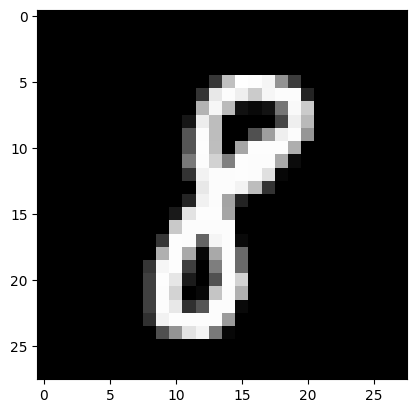

In [13]:
i = np.random.randint(0, X_traning.shape[0])
print(y_trainging[i])
plt.imshow(X_traning[i], cmap='gray')

In [16]:
X_traning = X_traning.reshape(X_traning.shape[0], 28, 28, 1).astype('float32')
X_traning.shape

(60000, 28, 28, 1)

In [19]:
X_traning[0].min(), X_traning[0].max()

(0.0, 255.0)

In [20]:
#X_traning = X_traning / 255
X_traning = (X_traning - 127.5) / 127.5
X_traning[0].min(), X_traning[0].max()

(-1.0, 1.0)

In [21]:
buffer_size = 60000
batch_size = 256 #Mini batch gradient descent

In [22]:
buffer_size/batch_size

234.375

In [23]:
X_traning = tf.data.Dataset.from_tensor_slices(X_traning).shuffle(buffer_size).batch(batch_size)

In [24]:
type(X_traning)

tensorflow.python.data.ops.batch_op._BatchDataset

In [25]:
X_traning

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>